In [2]:
#!/usr/bin/env python

import numpy as np
import MDAnalysis
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import pandas as pd
import subprocess, os, StringIO, re, datetime, time, sys
import optparse

def obtain_asphericity_change(u, mol):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    dim = u.dimensions[0:3]
    middle = dim/2.0
    Asphere = []
    for ts in u.trajectory:
        Asphere.append((u.trajectory.time, MA0x5_buffer.radius_of_gyration(pbc = True)))
    Asphere = np.array(Asphere)
    return Asphere

def obtain_end2end_dist(u, mol):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    Output = []
    for ts in u.trajectory:
        N = u.select_atoms("resid 1 and name N")
        C = u.select_atoms("resid 5 and name C")
        
        Output.append((u.trajectory.time, np.linalg.norm(C.positions - N.positions)))
    Output = np.array(Output)
    return Output

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def obtain_direction_dist(u, mol, carbon, oxygen):
    MA0x5_buffer = u.select_atoms("resname " + str(mol))
    x,y,z = [], [] ,[]
    for ts in u.trajectory:
        for i in range(5):
            C = u.select_atoms("resid " + str(i + 1) + " and name " + carbon)
            O = u.select_atoms("resid " + str(i + 1) + " and name " + oxygen)
        
            tmp = (C.positions - O.positions)[0]
        
            x.append(tmp[0])
            y.append(tmp[1])
            z.append(tmp[2])

    #Output = np.array(Output)
    return x,y,z



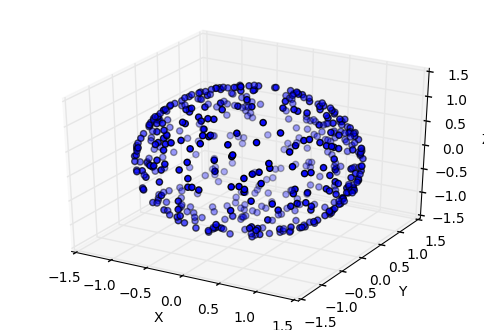

In [104]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/13.MB1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
x,y,z = obtain_direction_dist(u, "MB1", "CN", "OF2")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(x,y,z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


plt.show()

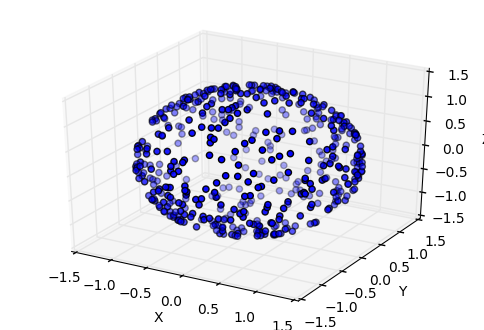

In [106]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/12.MB0x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
x,y,z = obtain_direction_dist(u, "MB0", "CN", "OF2")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


plt.show()

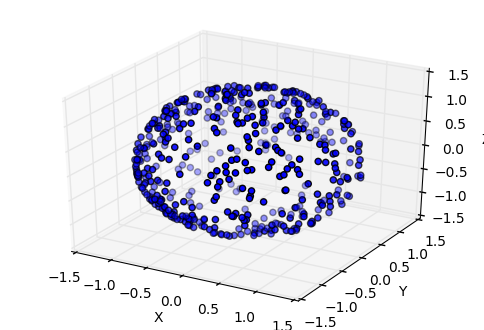

In [108]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/polymer.gro", "/home/shuzhe//Simulations/23week/11.MA1x5_solv_buffer_multi_trj/Output/pcca1_100samples.xtc")
x,y,z = obtain_direction_dist(u, "MA1", "CO", "OE2")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


plt.show()

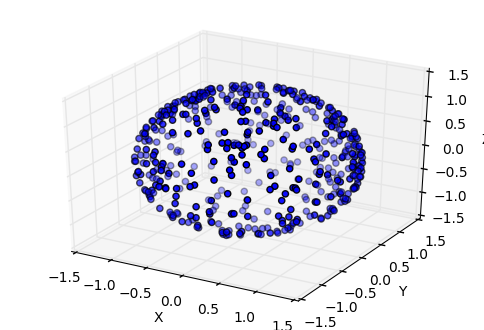

In [6]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/6.MA0x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
x,y,z = obtain_direction_dist(u, "MA0", "CO", "OE2")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


plt.show()

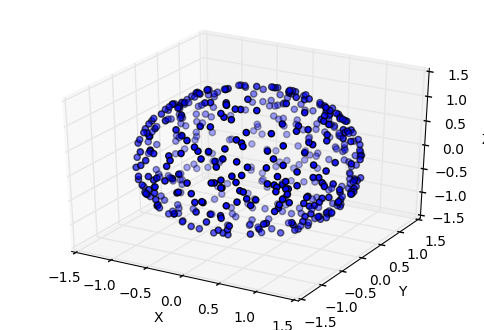

In [7]:
u = MDAnalysis.Universe("/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/polymer.gro", "/home/shuzhe//Simulations/30week/7.MA1x5_RE_interface_pyemma/Input/pcca1_100samples.xtc")
x,y,z = obtain_direction_dist(u, "MA1", "CO", "OE2")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])


plt.show()